In [1]:
import pandas as pd
import numpy as np

### 1. Load & Overview

This step loads and overviews data to get an intuitive understanding of the train dataset. The following the steps have been done in this part.
- [x] Load all train data
- [x] Load all labels and corresponding to the train dataset

In [7]:
train_path = '../data/train.csv'
# train_path = '/kaggle/input/predict-student-performance-from-game-play/train.csv'
label_path = '../data/train_labels.csv'
# label_path = '/kaggle/input/predict-student-performance-from-game-play/train_labels.csv'
test_path = '../data/test.csv'

#### 1.1 Load all train

For this step, we basically load all train data into this notebooks, considering about the memory problem, we specify the data type to reduce the space the whole data would take to avoid the problem.

In [49]:
dtypes={
    'index': np.int32,
    'elapsed_time':np.int32,
    'event_name':'category',
    'name':'category',
    'level':np.uint8,
    'room_coor_x':np.float32,
    'room_coor_y':np.float32,
    'screen_coor_x':np.float32,
    'screen_coor_y':np.float32,
    'hover_duration':np.float32,
    'text':'category',
    'fqid':'category',
    'room_fqid':'category',
    'text_fqid':'category',
    'fullscreen':'category',
    'hq':'category',
    'music':'category',
    'level_group':'category'}

df = pd.read_csv(train_path, dtype=dtypes)

In [50]:
df.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296946 entries, 0 to 26296945
Data columns (total 20 columns):
 #   Column          Dtype   
---  ------          -----   
 0   session_id      int64   
 1   index           int32   
 2   elapsed_time    int32   
 3   event_name      category
 4   name            category
 5   level           uint8   
 6   page            float64 
 7   room_coor_x     float32 
 8   room_coor_y     float32 
 9   screen_coor_x   float32 
 10  screen_coor_y   float32 
 11  hover_duration  float32 
 12  text            category
 13  fqid            category
 14  room_fqid       category
 15  text_fqid       category
 16  fullscreen      category
 17  hq              category
 18  music           category
 19  level_group     category
dtypes: category(10), float32(5), float64(1), int32(2), int64(1), uint8(1)
memory usage: 1.4 GB


Addtional explaination about the columns:

column | explaination 
-|-
session_id | the ID of the session the event took place in
index | the index of the event for the session
elapsed_time | how much time has passed (in milliseconds) between the start of the session and when the event was recorded
event_name | the name of the event type
name | the event name (e.g. identifies whether a notebook_click is is opening or closing the notebook)
level | what level of the game the event occurred in (0 to 22)
page | the page number of the event (only for notebook-related events)
room_coor_x | the coordinates of the click in reference to the in-game room (only for click events)
room_coor_y | the coordinates of the click in reference to the in-game room (only for click events)
screen_coor_x | the coordinates of the click in reference to the player’s screen (only for click events)
screen_coor_y | the coordinates of the click in reference to the player’s screen (only for click events)
hover_duration | how long (in milliseconds) the hover happened for (only for hover events)
text | the text the player sees during this event
fqid | the fully qualified ID of the event
room_fqid | the fully qualified ID of the room the event took place in
text_fqid | the fully qualified ID of the
fullscreen | whether the player is in fullscreen mode
hq | whether the game is in high-quality
music | whether the game music is on or off
level_group | which group of levels - and group of questions - this row belongs to (0-4, 5-12, 13-22)

#### 1.2 Load all labels and corresponding to the train dataset

In this step, we have loaded all labels, and corresponding these labels to train data.

In [52]:
labels = pd.read_csv(label_path)
labels.head()

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1


For this step, since session_id is in the format that {id}_{question number}. We split this session_id into user_id and question_number

In [53]:
labels['sessID_qesID'] = labels['session_id']

session_id = []
index = []
for sessID_qesID in labels['session_id']:
    sess_id, qes_id = sessID_qesID.split('_')
    session_id.append(int(sess_id))
    index.append(int(qes_id[1:]))
    
labels['session_id'] = np.array(session_id)
labels['index'] = np.array(index)

In [55]:
dtypes = {
    'correct':'int32',
    'index': 'int32'
}
labels = labels.astype(dtypes)

labels.head()

,session_id,correct,sessID_qesID,index
0,20090312431273200,1,20090312431273200_q1,1
1,20090312433251036,0,20090312433251036_q1,1
2,20090312455206810,1,20090312455206810_q1,1
3,20090313091715820,0,20090313091715820_q1,1
4,20090313571836404,1,20090313571836404_q1,1


When merge two dataframes, we will have many invalid rows, considering they don't have labels.

In [85]:
pd.concat((labels.groupby('session_id').size().rename('label'), df.groupby('session_id').size().rename('df')), axis=1)

,label,df
session_id,,
20090312431273200,18,881
20090312433251036,18,1831
20090312455206810,18,758
20090313091715820,18,993
20090313571836404,18,746
...,...,...
22100215342220508,18,873
22100215460321130,18,985
22100217104993650,18,1199


In [86]:
# merge the two dataframes
merged_df = pd.merge(labels, df, on=["session_id", "index"], how="right")
merged_df[~merged_df['correct'].isna()].groupby('session_id').size()

session_id
20090312431273200    18
20090312433251036    18
20090312455206810    18
20090313091715820    18
20090313571836404    18
                     ..
22100215342220508    18
22100215460321130    18
22100217104993650    18
22100219442786200    18
22100221145014656    18
Length: 23484, dtype: int64

Finally, we got the final df

In [96]:
df = merged_df[~merged_df['correct'].isna()]
df = df[df.columns.difference(['sessID_qesID'])]
df.head()

,correct,elapsed_time,event_name,fqid,fullscreen,hover_duration,hq,index,level,level_group,...,name,page,room_coor_x,room_coor_y,room_fqid,screen_coor_x,screen_coor_y,session_id,text,text_fqid
1,1.0,1323,person_click,gramps,0,NaN,0,1,0,0-4,...,basic,NaN,-413.991394,-159.314682,tunic.historicalsociety.closet,380.0,494.0,20090312431273200,"Whatcha doing over there, Jo?",tunic.historicalsociety.closet.gramps.intro_0_...
2,1.0,831,person_click,gramps,0,NaN,0,2,0,0-4,...,basic,NaN,-413.991394,-159.314682,tunic.historicalsociety.closet,380.0,494.0,20090312431273200,Just talking to Teddy.,tunic.historicalsociety.closet.gramps.intro_0_...
3,1.0,1147,person_click,gramps,0,NaN,0,3,0,0-4,...,basic,NaN,-413.991394,-159.314682,tunic.historicalsociety.closet,380.0,494.0,20090312431273200,I gotta run to my meeting!,tunic.historicalsociety.closet.gramps.intro_0_...
4,1.0,1863,person_click,gramps,0,NaN,0,4,0,0-4,...,basic,NaN,-412.991394,-159.314682,tunic.historicalsociety.closet,381.0,494.0,20090312431273200,"Can I come, Gramps?",tunic.historicalsociety.closet.gramps.intro_0_...
5,1.0,3423,person_click,gramps,0,NaN,0,5,0,0-4,...,basic,NaN,-412.991394,-157.314682,tunic.historicalsociety.closet,381.0,492.0,20090312431273200,"Sure thing, Jo. Grab your notebook and come up...",tunic.historicalsociety.closet.gramps.intro_0_...


### Data visualization

In [89]:
import matplotlib.pyplot as plt

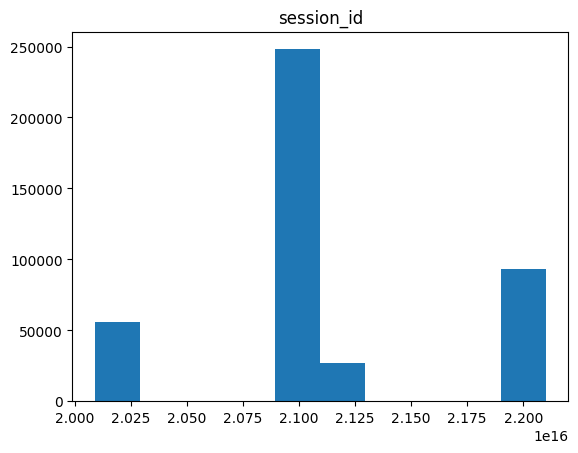

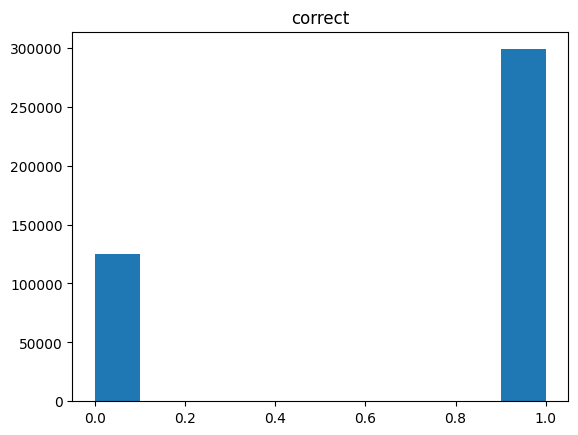

KeyboardInterrupt: 

In [90]:
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [ ]:
CATEGORICAL = ['event_name', 'name','fqid', 'room_fqid', 'text_fqid']
NUMERICAL = ['elapsed_time','level','page','room_coor_x', 'room_coor_y', 
        'screen_coor_x', 'screen_coor_y', 'hover_duration']